In [5]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:

def video_preprocess(videofile, frames=False, coords=True):
    """Extracts the frames and coordinates of points of interest/joints from the dance video and returns
    a list of frames and an np.array of coordinates with the joints."""
    
    cap = cv2.VideoCapture(path)
    
    #Initiating list to extract coordinates
    poi_coords = []
    
    #Initiating list to extract frames
    frames_lst = []
        
    ## Setup mediapipe instance
    with mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():

            ret, frame = cap.read()
            
            #Putting extracted frame into list
            frames_lst.append(frame)
            
            #Ends loop when video ends // avoids error message
            if ret == False:
                cap.release()
                cv2.destroyAllWindows()
                break
                
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            interim = []
            try:
                landmarks = results.pose_landmarks.landmark

                for id, lm in enumerate(landmarks):
                    interim.append((lm.x, lm.y, lm.z))
                poi_coords.append(interim)
            except:
                pass


            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               

            cv2.imshow('Mediapipe Feed', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                
    poi_coords = np.array(poi_coords)
                
    if frames and coords:
        return frames_lst, poi_coords
    
    elif frames == True and not coords:
        return frames_lst
    
    elif not frames and coords:
        return poi_coords
    
    else:
        return None

In [62]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(a,b,c):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(a-b)
    v2_u = unit_vector(c-b)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [55]:
"""Encoding of different Points of interest"""

NOSE = 0
LEFT_EYE_INNER = 1
LEFT_EYE = 2
LEFT_EYE_OUTER = 3
RIGHT_EYE_INNER = 4
RIGHT_EYE = 5
RIGHT_EYE_OUTER = 6
LEFT_EAR = 7
RIGHT_EAR = 8
MOUTH_LEFT = 9
MOUTH_RIGHT = 10
LEFT_SHOULDER = 11
RIGHT_SHOULDER = 12
LEFT_ELBOW = 13
RIGHT_ELBOW = 14
LEFT_WRIST = 15
RIGHT_WRIST = 16
LEFT_PINKY = 17
RIGHT_PINKY = 18
LEFT_INDEX = 19
RIGHT_INDEX = 20
LEFT_THUMB = 21
RIGHT_THUMB = 22
LEFT_HIP = 23
RIGHT_HIP = 24
LEFT_KNEE = 25
RIGHT_KNEE = 26
LEFT_ANKLE = 27
RIGHT_ANKLE = 28
LEFT_HEEL = 29
RIGHT_HEEL = 30
LEFT_FOOT_INDEX = 31
RIGHT_FOOT_INDEX = 32

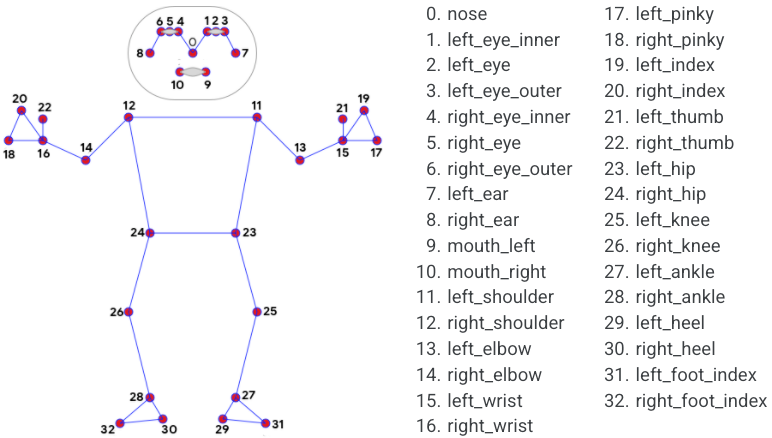

In [102]:
def angles(data):
    """Takes coordinates from video_preprocess function and outputs the data for the different angles"""
    return (angle_between(data[LEFT_WRIST], data[LEFT_ELBOW], data[LEFT_SHOULDER]),\
    angle_between(data[LEFT_HIP], data[LEFT_SHOULDER], data[LEFT_ELBOW]),\
    angle_between(data[LEFT_SHOULDER], data[LEFT_HIP], data[LEFT_KNEE]),\
    angle_between(data[LEFT_HIP], data[LEFT_KNEE], data[LEFT_ANKLE]),\
    angle_between(data[LEFT_KNEE], data[LEFT_ANKLE], data[LEFT_FOOT_INDEX]),\
    angle_between(data[RIGHT_WRIST], data[RIGHT_ELBOW], data[RIGHT_SHOULDER]),\
    angle_between(data[RIGHT_HIP], data[RIGHT_SHOULDER], data[RIGHT_ELBOW]),\
    angle_between(data[RIGHT_SHOULDER], data[RIGHT_HIP], data[RIGHT_KNEE]),\
    angle_between(data[RIGHT_HIP], data[RIGHT_KNEE], data[RIGHT_ANKLE]),\
    angle_between(data[RIGHT_KNEE], data[RIGHT_ANKLE], data[RIGHT_FOOT_INDEX]))


In [104]:
angles_frames = []
for i in pl_array:
    angles_frames.append(angles(i))

angles_frames

[(2.1341381008331948,
  1.491179955760637,
  2.0535036382059806,
  1.3201840763050647,
  1.190824497003253,
  1.9476850368247958,
  1.3486291573971783,
  1.8228846398953873,
  1.1458222713084458,
  1.2209391541422385),
 (2.0459267266583083,
  1.1698180122208186,
  2.5819846868438745,
  1.6506489533062128,
  1.3163504369593255,
  1.8792976362061116,
  1.0651933761316608,
  2.4658859635185766,
  1.6808950488789092,
  1.298569984688994),
 (2.098463179588873,
  1.1310424276857238,
  2.7858314225253697,
  1.8201797375521345,
  1.2731920089478879,
  1.9256279510640972,
  1.051868786869394,
  2.5339257955981522,
  1.6422324216698556,
  1.343367272509445),
 (2.190563090477451,
  1.03315269826657,
  2.731102335382865,
  1.8790897095370265,
  1.2537242399249107,
  2.1722370215772706,
  1.0852614595613723,
  2.8288706927623366,
  1.9908628577118734,
  1.1991762624971618),
 (2.221127509391992,
  0.9361962279581973,
  2.6503868809042297,
  1.6918677812659455,
  1.2574741548883757,
  2.1957919922607